In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
CattleWeight = pd.read_csv(r"C:\Users\julio\Desktop\intergado\DB\.ipynb_checkpoints\CattleWeight.csv")

# Extraindo a raça Crioulo Mestiço de Corte
cattleXC = CattleWeight[CattleWeight.breed == 'XC']

In [43]:
# Função para ordenar os meses
def month_sort(column):
    """
     O primeiro mês de registrado foi dezembro, por esse motivo é necessario a função Month_sort para ordenar
     as datas no periodo correto.
    """
    month = ['December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
    correspondence = {month: order for order, month in enumerate(month)}
    return column.map(correspondence)

In [44]:
# Removendo Outline identificado. 2 Gados com 0.0KG

outline = list(cattleXC[cattleXC.arroba == '0-11'].cow_id.unique())
cattleXC = cattleXC.query(f'cow_id not in {outline}')

## Iniciando analise do desempenho de crescimento da Raça Crioulo Mestiço de Corte.


Um desafio associado à criação de gado Raramuri Criollo (RC) para corte é a falta de mercados para bezerros desmamados. Os fazendeiros que criam gado RC devem cruzar suas vacas com touros de raças de corte melhoradas para obter bezerros comercializáveis no desmame ou desenvolver seus filhotes RC em pastagens. Um experimento foi conduzido no deserto de Chihuahuan usando dois Cohorts de Rarámuri Crioulo (RC), Crioulo Mexicano (MC) e Crioulo × Mestiço de Corte (XC). para investigar os efeitos do biótipo do novilho (breed) no desempenho de crescimento. 

### 1.Variação de Peso

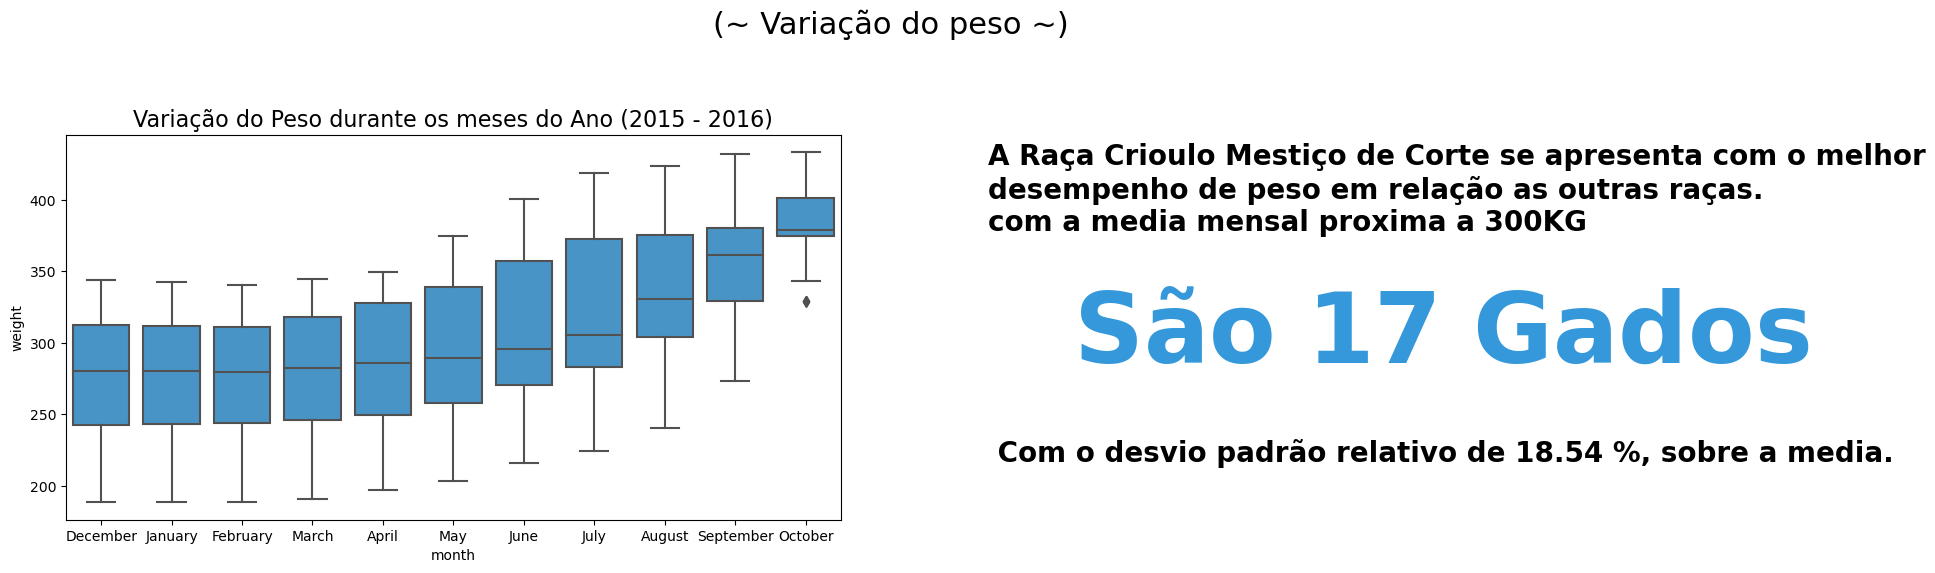

In [45]:
# figure
fig, axes = plt.subplots(1,2, figsize=(22, 5))

# Title
fig.suptitle('(~ Variação do peso ~)', fontsize=22, y=1.13)

# Plot (boxplot) 0
sns.boxplot(ax=axes[0], data=cattleXC, x='month', y='weight', color='#3498db')
axes[0].set_title('Variação do Peso durante os meses do Ano (2015 - 2016)', fontsize=16, color='black')

# Plot (text) 1
axes[1].axis("off")  
axes[1].text(-0.01, 0.75,                                                               
         'A Raça Crioulo Mestiço de Corte se apresenta com o melhor\n\
desempenho de peso em relação as outras raças.\n\
com a média mensal próxima a 300KG ',  
         fontsize=20,                                                             
         color='black',                                                         
         weight="bold");

# Quantidade de gados
qtd = len(cattleXC.cow_id.unique())
axes[1].text(0.1, 0.48, f'$\\bfSão$ $\\bf{qtd}$ $\\bfGados$',
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=70, color='#3498db',
       );

# Desvio padrão relativo / coeficiente de variação
RSD = round((cattleXC['weight'].std() * 100 ) / cattleXC['weight'].mean(), 2)
axes[1].axis("off")  
axes[1].text(-0.01, 0.15,                                                               
         f' Com o desvio padrão relativo de {RSD} %, sobre a media.',  
         fontsize=20,                                                             
         color='black',                                                         
         weight="bold");

### 2.Influencia de Cohort

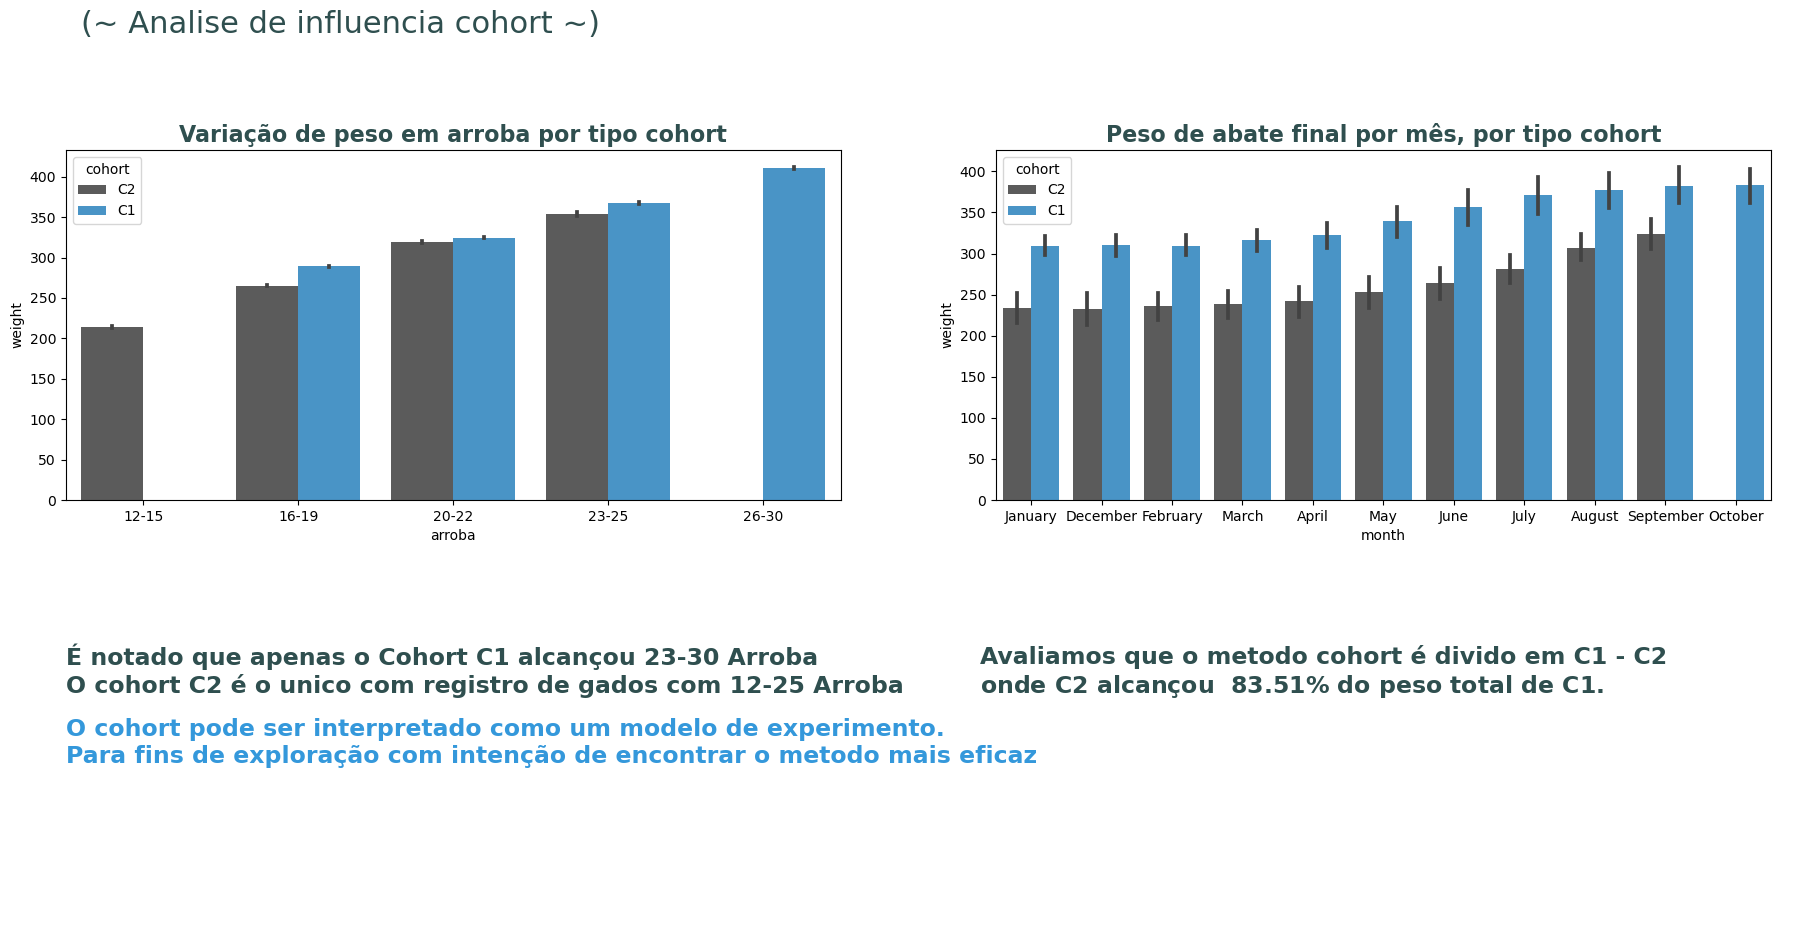

In [46]:
# Palette
textcolor = '#2f4f4f'
palettecolor = ['#5B5B5B','#3498db']

# figure
fig, axes = plt.subplots(2,2, figsize=(22, 10))

# title
fig.suptitle('(~ Analise de influencia cohort ~)', fontsize=22, y=1.02, x=0.25, color=textcolor)

# plot (barplot)[0,0]
sns.barplot(ax=axes[0,0], data=cattleXC, x="arroba", y="weight", hue="cohort", palette=palettecolor)
axes[0,0].set_title('Variação de peso em arroba por tipo cohort', fontsize=16, color=textcolor, weight="bold")

# plot (barplot)[0,1]
lastweight = cattleXC.groupby(['month','cow_id', 'cohort'])['weight'].last().reset_index().sort_values(by=['weight'])
sns.barplot(ax=axes[0,1], data=lastweight, x="month", y="weight", hue="cohort", palette=palettecolor)
axes[0,1].set_title('Peso de abate final por mês, por tipo cohort', fontsize=16, color=textcolor,weight="bold")

# Plot (text)[1,0]
C2 = cattleXC[cattleXC.cohort == 'C2']['weight'].max()
C1 = cattleXC[cattleXC.cohort == 'C1']['weight'].max()
WEIGHTMAX = round((C2 * 100)/ C1, 2)


axes[1,0].text(0.0, 0.65,                                                               
         f'É notado que apenas o Cohort C1 alcançou 23-30 Arroba \
             \nO cohort C2 é o único com registro de gados com 12-25 Arroba',  
         fontsize=17,                                                             
         color=textcolor,                                                         
         weight="bold");

axes[1,0].axis("off")  
axes[1,0].text(0.0, 0.45,                                                               
         "O cohort pode ser interpretado como um modelo de experimento. \
\nPara fins de exploração com intenção de encontrar o método mais eficaz",
         fontsize=17,                                                             
         color='#3498db',                                                         
         weight="bold");

axes[1,0].text(1.18, 0.65,                                                               
         f'Avaliamos que o método cohort é divido em C1 - C2 \
             \nonde C2 alcançou  $\\bf{WEIGHTMAX}$% do peso total de C1.',  
         fontsize=17,                                                             
         color=textcolor,                                                         
         weight="bold");


# Plot (None)[1,1]
axes[-1, -1].axis('off');

### 3.Ganho de peso esperado

In [47]:
# Agrupando o peso maximo de cada mês
cattleXC_pesoMensal = cattleXC.groupby(by=['month', 'year', 'cow_id', 'cohort'])['weight'].max().reset_index().sort_values(by='cow_id').rename(columns={'weight': 'weightMAX'})

# Extraindo a Media do peso de rebanho no primeiro mês de pesquisa.
MediaDoPrimeiroMes = cattleXC_pesoMensal[cattleXC_pesoMensal.month == 'December']['weightMAX'].mean()

# Peso Final Esperado
PesoFinalEsperado = (MediaDoPrimeiroMes + 90) # https://dicas.boisaude.com.br/quantas-arrobas-um-bezerro-engorda-por-ano/
PesoFinalEsperado

# Peso Mensal Esperado
PME = (90/12) # https://dicas.boisaude.com.br/quantas-arrobas-um-bezerro-engorda-por-ano/
PesoMensalEsperado = cattleXC_pesoMensal.groupby(by=['month'])['weightMAX'].mean().reset_index().rename(columns={'weightMAX': 'weightMEAN'})
PesoMensalEsperado['PesoMensalEsperado'] = PesoMensalEsperado['weightMEAN'] + PME

# Merge
cattleXC_pesoMensal = cattleXC_pesoMensal.merge(PesoMensalEsperado[['month', 'PesoMensalEsperado']], on='month')
cattleXC_pesoMensal

,month,year,cow_id,cohort,weightMAX,PesoMensalEsperado
0,April,2016,2017,C1,288.623367,292.498878
1,April,2016,2029,C1,287.259814,292.498878
2,April,2016,2030,C1,299.895591,292.498878
3,April,2016,2031,C1,348.695610,292.498878
4,April,2016,2035,C1,314.857647,292.498878
...,...,...,...,...,...,...
174,September,2016,6713,C2,336.111672,362.550542
175,September,2016,6718,C2,292.566840,362.550542
176,September,2016,6721,C2,337.926040,362.550542
177,September,2016,6722,C2,361.739620,362.550542


In [48]:
# Ignore Warning Setting With Copy
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

# Convertendo Aproveitamento
cattleXC_pesoMensal['aproveitamento'] = ((cattleXC_pesoMensal.weightMAX / cattleXC_pesoMensal.PesoMensalEsperado) * 100) - 100

def aproveitamento(x):
    if x < 0:
        return 'negativo'
    elif x > 0:
        return 'positivo'
    return None

# Criando coluna de aproveitamento acima do esperado
cattleXC_pesoMensal['aproveitamento'] = cattleXC_pesoMensal['aproveitamento'].apply(aproveitamento)
cattleXC_pesoMensal


# Ordenando os meses
cattleXC_pesoMensal = cattleXC_pesoMensal.sort_values(by='month', key=month_sort)

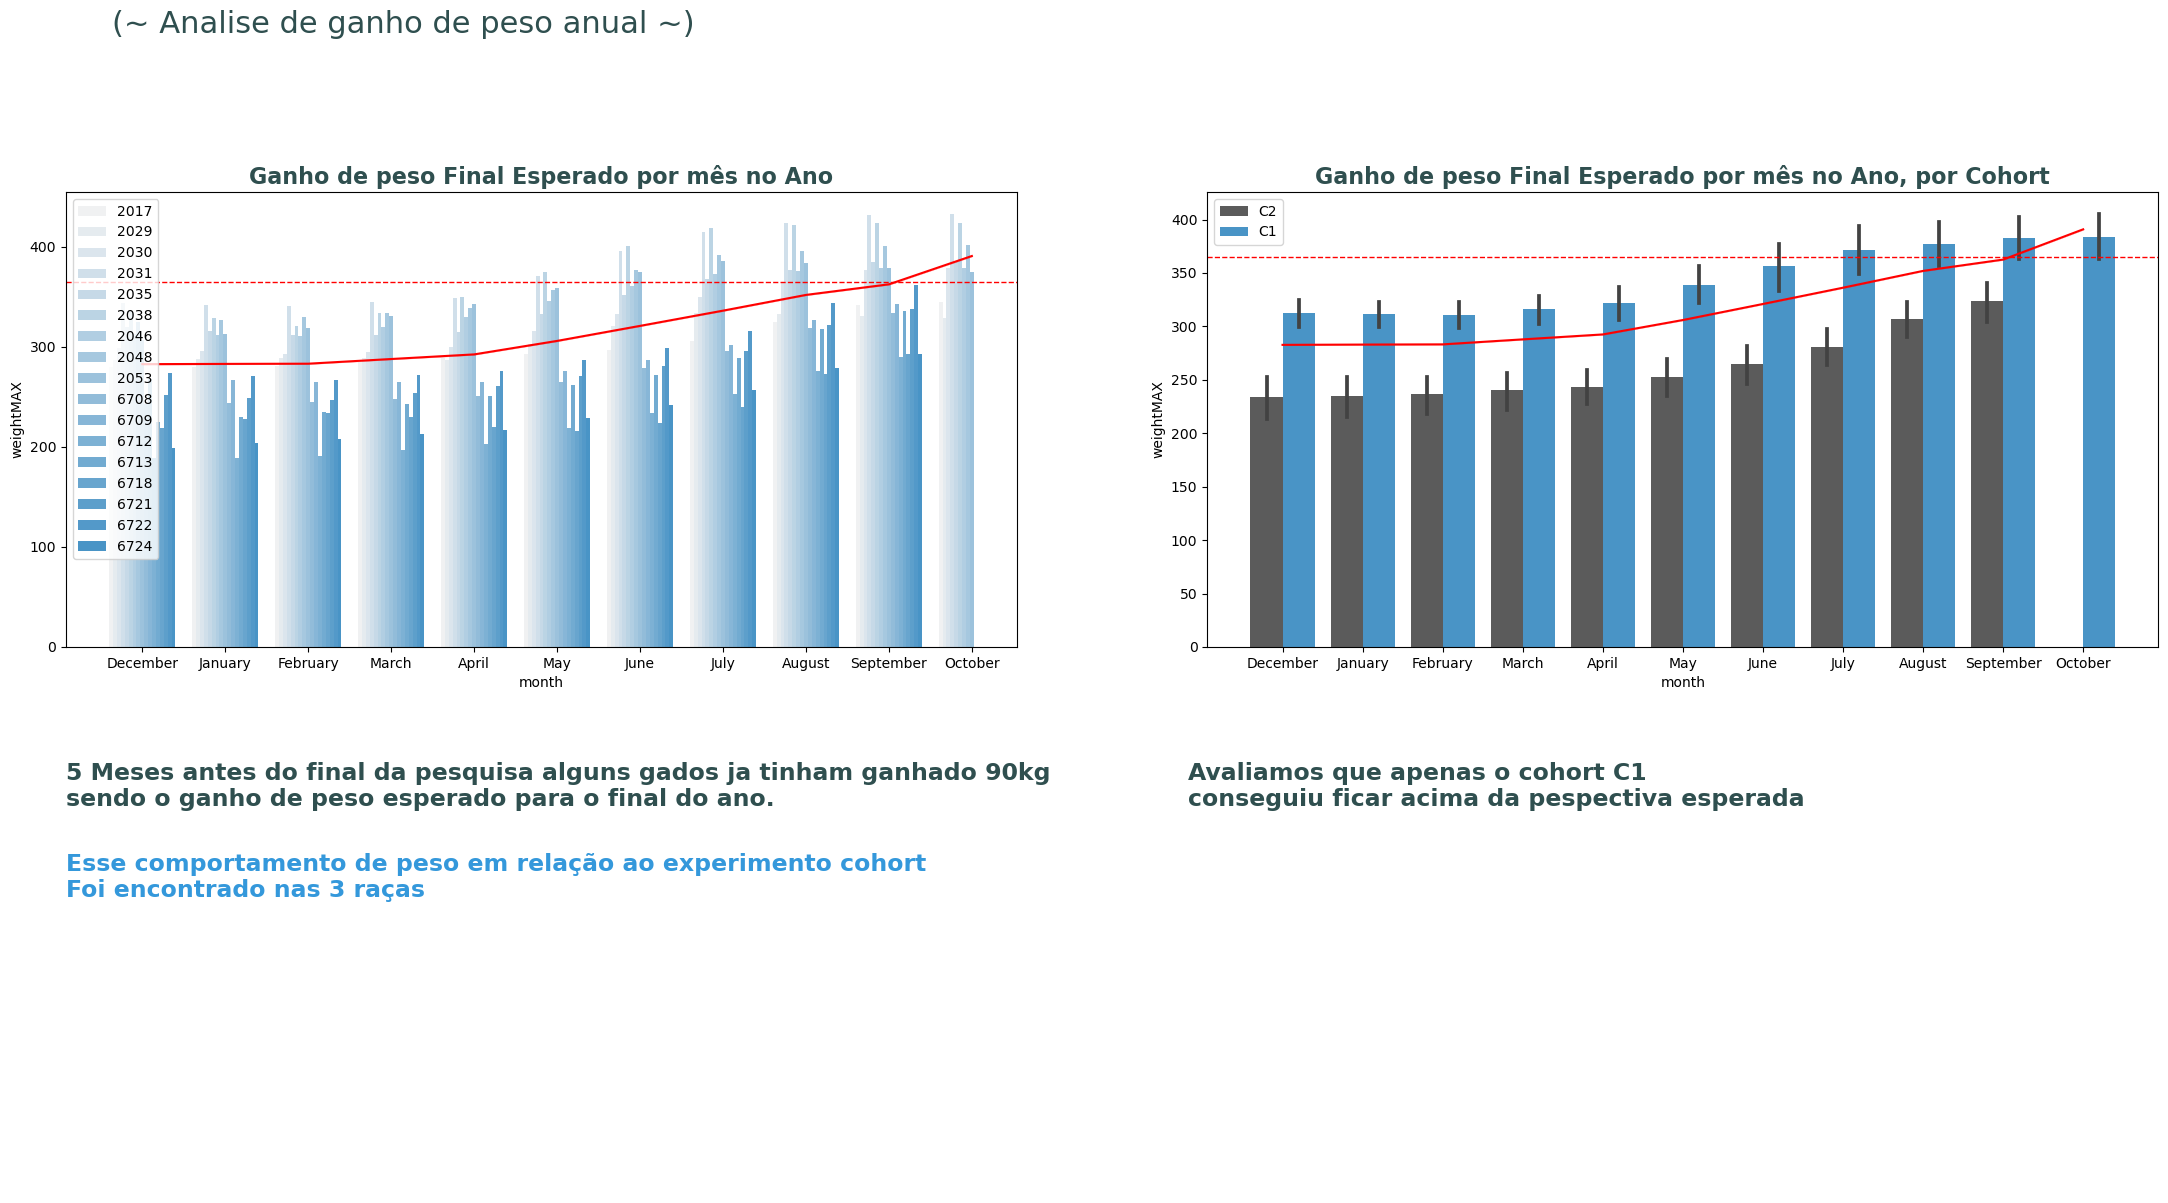

In [52]:
# palette
color = '#3498db'
palettecolor = ['#5B5B5B','#3498db']

# figure
fig, axes = plt.subplots(2,2, figsize=(27, 13))

# title
fig.suptitle('(~ Analise de ganho de peso anual ~)', fontsize=22, y=1.02, x=0.25, color=textcolor)

# plot (barplot)[0,0]
sns.barplot(ax=axes[0,0], data=cattleXC_pesoMensal, x='month', y='weightMAX', hue='cow_id',color=color) #(peso)
sns.lineplot(ax=axes[0,0], data=cattleXC_pesoMensal, x='month', y='PesoMensalEsperado', color='red') #(media esperada)
# ----
axes[0,0].set_title('Ganho de peso Final Esperado por mês no Ano', fontsize=16, color=textcolor, weight="bold")
axes[0,0].axhline(y=PesoFinalEsperado, color='red', linestyle='--', linewidth=1, label='max')


# plot (barplot)[0,1]
sns.barplot(ax=axes[0,1], data=cattleXC_pesoMensal, x='month', y='weightMAX', hue='cohort',palette=palettecolor) #(peso cohort)
sns.lineplot(ax=axes[0,1], data=cattleXC_pesoMensal, x='month', y='PesoMensalEsperado', color='red') #(media esperada)

# ----
axes[0,1].set_title('Ganho de peso Final Esperado por mês no Ano, por Cohort', fontsize=16, color=textcolor, weight="bold")
axes[0,1].axhline(y=PesoFinalEsperado, color='#FF0000', linestyle='--', linewidth=1, label='max');


# plot (text)[1,0]
axes[1,0].axis("off")

axes[1,0].text(0.0, 0.85,                                                               
         f'5 Meses antes do final da pesquisa alguns gados já tinham ganhado 90kg \
             \nsendo o ganho de peso esperado para o final do ano.',  
         fontsize=17,                                                             
         color=textcolor,                                                         
         weight="bold");

axes[1,0].text(0.0, 0.65,                                                               
         f'Esse comportamento de peso em relação ao experimento cohort \
             \nFoi encontrado nas 3 raças',
         fontsize=17,                                                             
         color='#3498db',                                                         
         weight="bold");

axes[1,0].text(1.18, 0.85,                                                               
         f'Avaliamos que apenas o cohort C1 \
             \nconseguiu ficar acima da perspectiva esperada',  
         fontsize=17,                                                             
         color=textcolor,                                                         
         weight="bold");


# Plot (None)[1,1]
axes[-1, -1].axis('off');

### 4.Aproveitamento Acima do esperado

In [53]:
# aproveitamento acima do esperado
aproveitamento = pd.DataFrame(cattleXC_pesoMensal.groupby(['month', 'aproveitamento']).aproveitamento.count()).rename(columns={'aproveitamento': 'qtd'}).reset_index()
aproveitamento = aproveitamento.sort_values(by='month', key=month_sort)
aproveitamento.head()

,month,aproveitamento,qtd
4,December,negativo,9
5,December,positivo,8
8,January,negativo,9
9,January,positivo,8
6,February,negativo,9


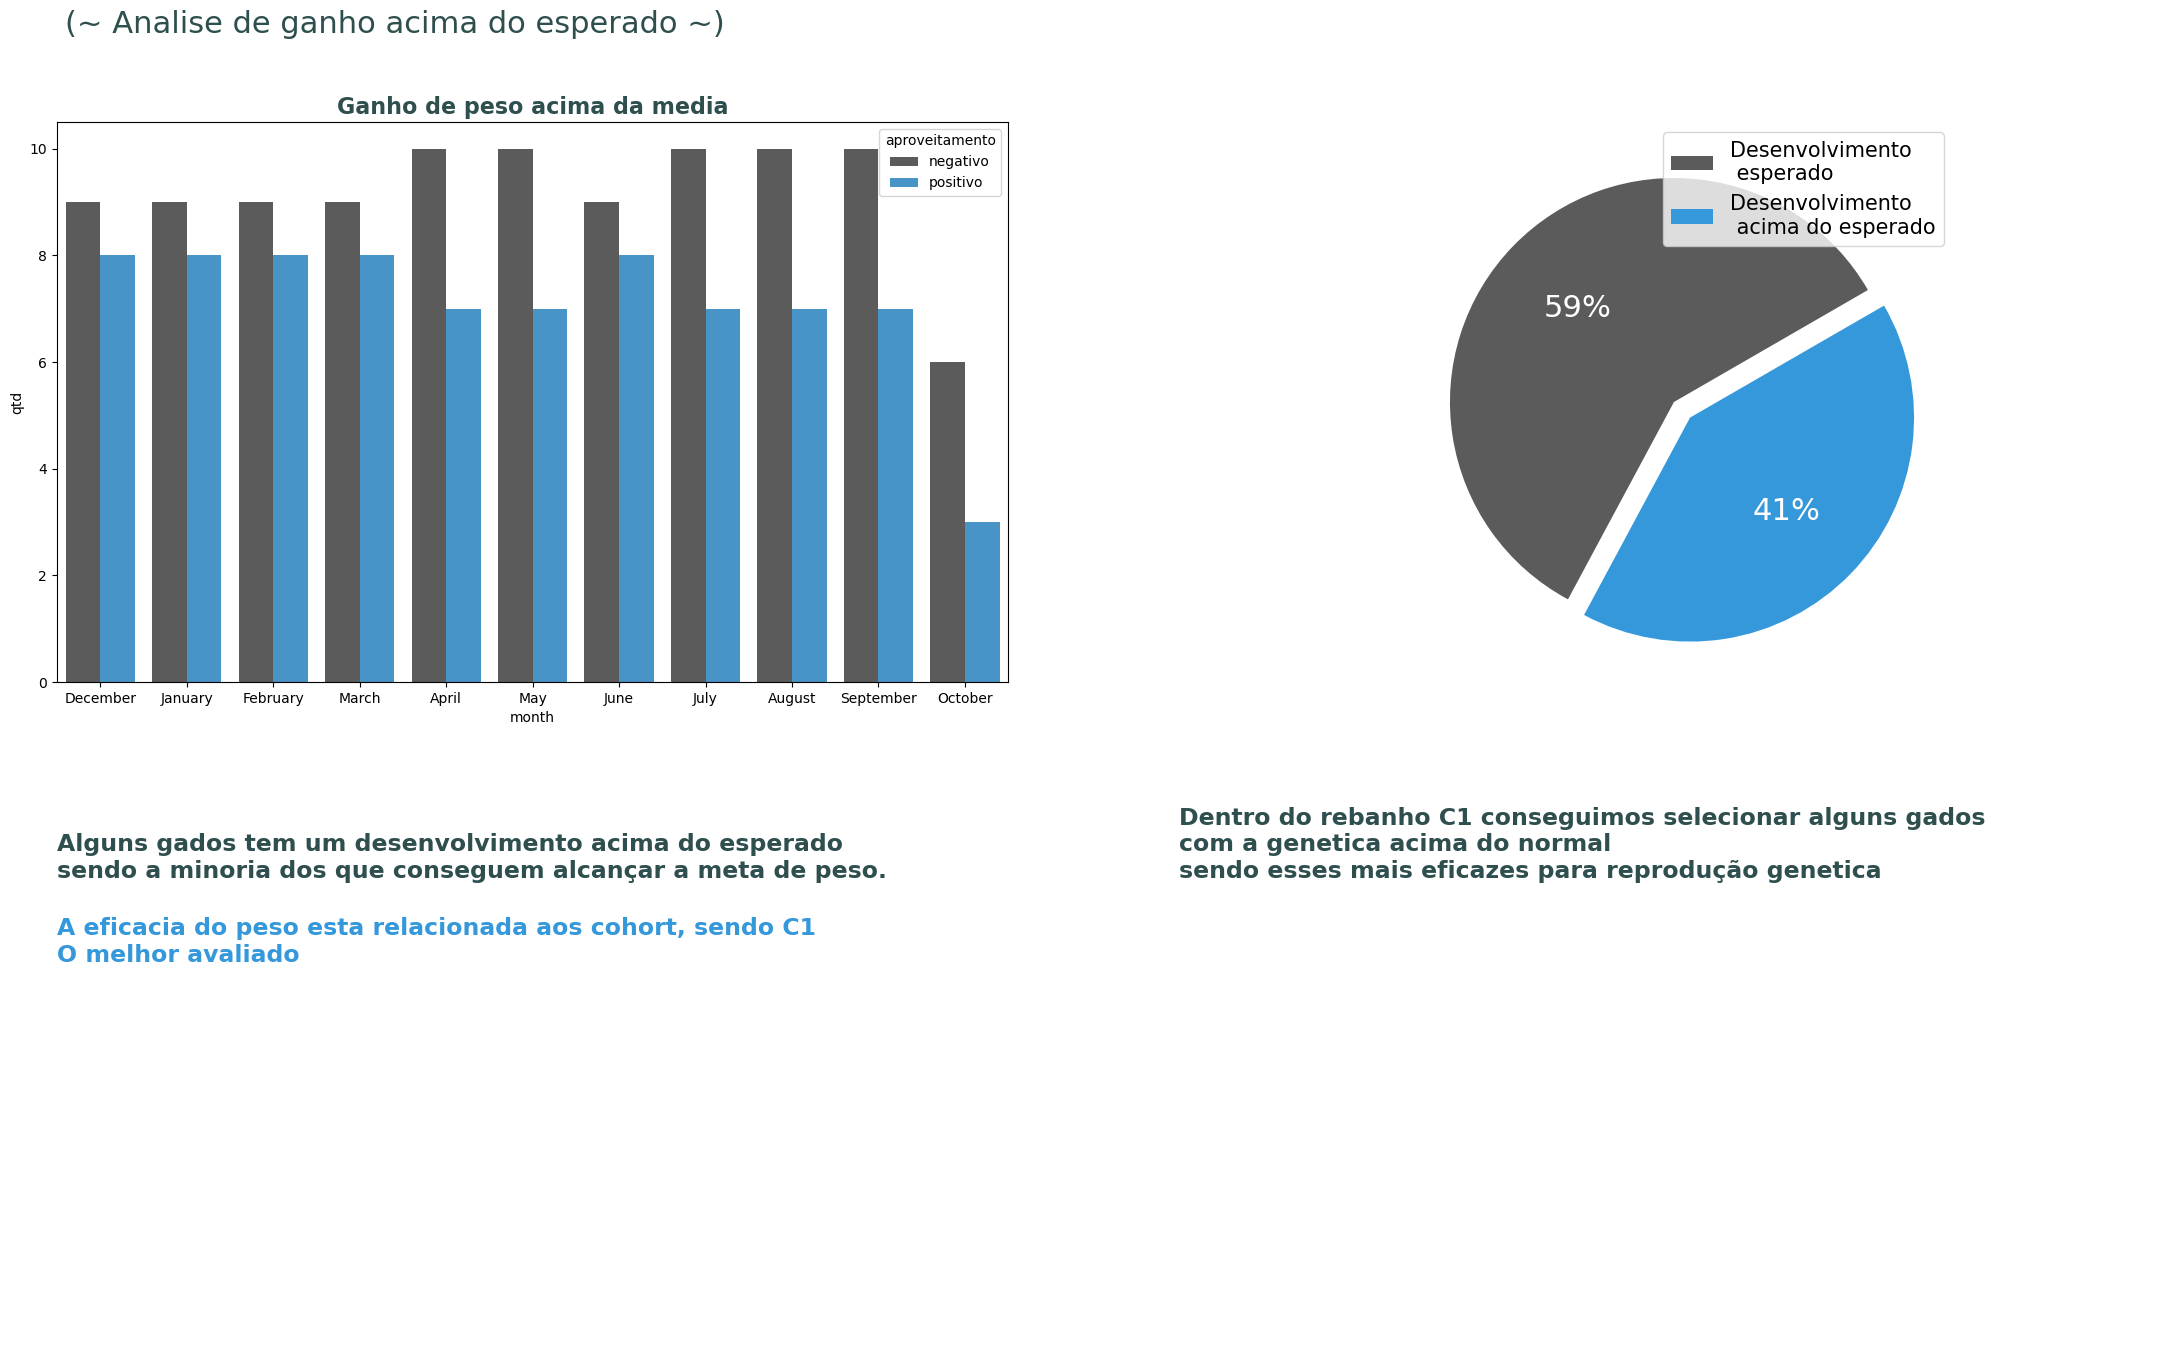

In [58]:
# palette
color = '#3498db'
palettecolor = ['#5B5B5B','#3498db']

# figure
fig, axes = plt.subplots(2,2, figsize=(27, 16))

# title
fig.suptitle('(~ Analise de ganho acima do esperado ~)', fontsize=22, y=0.95, x=0.25, color=textcolor)

# plot (barplot)[0,0]
sns.barplot(ax=axes[0,0], data=aproveitamento, x='month', y='qtd', hue='aproveitamento', palette=palettecolor)
axes[0,0].set_title('Ganho de peso acima da media', fontsize=16, color=textcolor, weight="bold");


# plot (pie)[1]
aproveitamentoID =  cattleXC_pesoMensal.groupby(['cow_id'])[['weightMAX', 'PesoMensalEsperado']].mean().reset_index().rename(columns={'weightMAX': 'weightMEAN', 'PesoMensalEsperado': 'PesoMedioMensalEsperado'})
aproveitamentoID['aproveitamento'] = ((aproveitamentoID.weightMEAN / aproveitamentoID.PesoMedioMensalEsperado) * 100) - 100

# Values
negativo = aproveitamentoID[aproveitamentoID.aproveitamento <= 0]['aproveitamento'].count()
positivo = aproveitamentoID[aproveitamentoID.aproveitamento > 0]['aproveitamento'].count()

data = [negativo, positivo]
labels = ['Desenvolvimento \n esperado', 'Desenvolvimento \n acima do esperado']
    
    
textprops={'fontsize': 22, 'color':"w"}
axes[0,1].pie(data, labels = labels, colors = palettecolor,textprops=textprops, autopct='%.0f%%', explode=(0, 0.1), startangle = 30, labeldistance=None)
axes[0,1].legend(fontsize=15)




# plot (text)[1,0]
axes[1,0].axis("off")

axes[1,0].text(0.0, 0.85,                                                               
         f'Alguns gados tem um desenvolvimento acima do esperado \
             \nsendo a minoria dos que conseguem alcançar a meta de peso.',  
         fontsize=17,                                                             
         color=textcolor,                                                         
         weight="bold");

axes[1,0].text(0.0, 0.7,                                                               
         f'A eficácia do peso está relacionada aos cohort, sendo C1 \
             \nO melhor avaliado',
         fontsize=17,                                                             
         color='#3498db',                                                         
         weight="bold");

axes[1,0].text(1.18, 0.85,                                                               
         f'No rebanho C1 conseguimos selecionar alguns gados \
             \ncom a genética acima do normal \
              \nsendo esses mais eficazes para reprodução genética',  
         fontsize=17,                                                             
         color=textcolor,                                                         
         weight="bold");


# Plot (None)[1,1]
axes[-1, -1].axis('off');


In [12]:
# Gados aptos para reprodução genetica
cattleXC_pesoMensal[cattleXC_pesoMensal.aproveitamento == 'positivo'].groupby(['cow_id'])[['weightMAX', 'PesoMensalEsperado']].mean().reset_index().rename(columns={'weightMAX': 'weightMEAN', 'PesoMensalEsperado': 'PesoMedioMensalEsperado'})

,cow_id,weightMEAN,PesoMedioMensalEsperado
0,2029,294.688142,291.570499
1,2030,322.262659,310.707082
2,2031,380.896558,317.993244
3,2035,338.891508,310.707082
4,2038,375.711044,317.993244
5,2046,341.903121,310.707082
6,2048,361.729672,317.993244
7,2053,349.518784,310.707082
